<a href="https://colab.research.google.com/github/savitaChari/W207-Final-Project-Group3_Section6/blob/main/EDA/W207_Final_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up / Load Data

### Notes from Blake to Andrew
- I assigned you to the Data Preprocessing steps. The first one leverage Tymon's built in scaling function he used. Please reach out if you have questions for me
- How would you use a smoothing factor for KNN models? I'm not sure this is possible, but we mentioned it in our midterm submission "Next Steps"
- We discussed data processing and hyperparameter tuning in our "Next Steps" however we didn't discuss any other types of feature engineering. Do you have any ideas to try for our final section? If so, please add them in the respective text cell. If not, let's plan on discussing in 1-2 weeks. We can look at the 95% accurate KNN model Tymon found to assist us with this.
- When you preform your data preprocessing, will you want to rerun each of my hyperparameter tuning models for all the different types of data or just use the hyperparameters that worked best for me? As long as you have a text cell descirbing what you chose and why, I'll agree with your decision.

- 
- I dont have other ideas for feature engineering but will think on it.
- 

### Things to change before handing in
- use full train and test data sets, remove mini data sets

In [225]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from zipfile import ZipFile

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [226]:
import sklearn
sklearn.__version__

'0.23.2'

In [240]:
# Load the data from covtype.zip
with ZipFile("covtype.zip") as myzip:
  data = myzip.open("covtype.csv")
df = pd.read_csv(data)
X = df.values[:, :-1]
y = df.values[:, -1]

# ensure input data is floats
X = X.astype('float32')

# label encode target and ensure the values are floats
y = LabelEncoder().fit_transform(y)

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

print('data shape: ', X.shape)
print('label shape:', y.shape)

# Set some variables to hold test and training data.
len_test = int(len(y)* (2/3))
len_train = int(len(y) * (1/3))+1
test_data, test_labels = X[len_test:], y[len_test:]
train_data, train_labels = X[:len_train], y[:len_train]
mini_train_data, mini_train_labels = train_data[:1000], train_labels[: 1000]
mini_test_data, mini_test_labels = test_data[:1000], test_labels[:1000]

data shape:  (581012, 54)
label shape: (581012,)


# Data Preprocessing (Andrew)

### Observe impact of the following data preprocessing methods:
- Scaling methodology (see Tymon's function)
- Normalizing our data to have values between 0 and 1 
- Converting continous features to be binary and not transforming our binary features
- Stratifying the dataset to ensure class distribution is identical within both training and test sets 
- Changing the ratio of training and test data from our original dataset will help reduce overfitting (Savita mentioned this has no affect but then I believe wanted us to try it again? I would prioritize this low because we have previous evidence that this doesn't help)

In [241]:
#Normalizing training data to have range of 0 to 1

def NormalizeData(train_data):
    return (train_data - np.min(train_data)) / (np.max(train_data) - np.min(train_data))
normalized_training_data = NormalizeData(train_data)
normalized_mini_training_data = NormalizeData(mini_train_data)

In [182]:
#Converting continous features to be binary and not transforming our binary features

#test for binary features (columns with all 0's or 1s)- all features are continuous!
binary_columns = train_df.columns[train_df.isin([0,1]).all()]
print (c)

#cut data into bins to convert data from continous to binary



Int64Index([], dtype='int64')


In [198]:
#Stratifying the dataset to ensure class distribution is identical within both training and test sets
#How to make this mini size?

strat_train, strat_test = train_test_split(df, test_size = 0.66, stratify = y)

print(strat_train.columns)
tr = train.groupby('Cover_Type').count()

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

Scale Data is in the 'Observe impact of the different data processing techniques' section as to not distrupt other data processing techniques

# Model Creation: Hyperparameter Tuning (Blake)

## Observe impact of the following hyperparameters:
- Number of neighbors 
- Weights 
- Distance formula (Manhattan or Euclidean) 
- Smoothing Factor?? (I dont think they have this for KNN but I could be wrong)

Accuracy of the KNN model with uniform weights, Manhattan Distance, and 1 neighbors is 0.612
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 2 neighbors is 0.605
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 3 neighbors is 0.616
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 4 neighbors is 0.607
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 5 neighbors is 0.619
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 6 neighbors is 0.619
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 7 neighbors is 0.623
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 8 neighbors is 0.637
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 9 neighbors is 0.641
Accuracy of the KNN model with uniform weights, Manhattan Distance, and 10 neighbors is 0.636


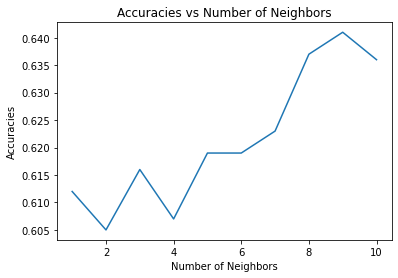

In [250]:
# Model for uniform weights and Manhattan Distance across different values of neighbors
# set hyperparameters
n = [1,2,3,4,5,6,7,8,9,10] # number of neighbors
w = 'uniform' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN models across different numbers of neighbors
combined_accuracies_1 = []
for i in n:
  model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
  model.fit(mini_train_data, mini_train_labels)

  # Determine the main metric of evaluation: Accuracy
  model_accuracy = model.score(mini_test_data, mini_test_labels)
  combined_accuracies_1.append(model_accuracy)
  print(f"Accuracy of the KNN model with uniform weights, Manhattan Distance, and {i} neighbors is {model_accuracy}")

# Plot impact of number of neighbors on accuracies 
plt.figure()
plt.plot(n, combined_accuracies_1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Number of Neighbors')
plt.show()

# # Determine the supplementary metrics of evaluation: Precision, Recall, and F1
# test_predicted_labels = model.predict(mini_test_data)
# classification = classification_report(mini_test_labels, test_predicted_labels) # reports Precision, Recall, and F1 Score
# print(f"The classification of KNN model is {classification}")

# # Create a confusion matrix for the model

Accuracy of the KNN model with distance weights, Manhattan Distance, and 1 neighbors is 0.612
Accuracy of the KNN model with distance weights, Manhattan Distance, and 2 neighbors is 0.611
Accuracy of the KNN model with distance weights, Manhattan Distance, and 3 neighbors is 0.622
Accuracy of the KNN model with distance weights, Manhattan Distance, and 4 neighbors is 0.633
Accuracy of the KNN model with distance weights, Manhattan Distance, and 5 neighbors is 0.641
Accuracy of the KNN model with distance weights, Manhattan Distance, and 6 neighbors is 0.639
Accuracy of the KNN model with distance weights, Manhattan Distance, and 7 neighbors is 0.641
Accuracy of the KNN model with distance weights, Manhattan Distance, and 8 neighbors is 0.649
Accuracy of the KNN model with distance weights, Manhattan Distance, and 9 neighbors is 0.655
Accuracy of the KNN model with distance weights, Manhattan Distance, and 10 neighbors is 0.657


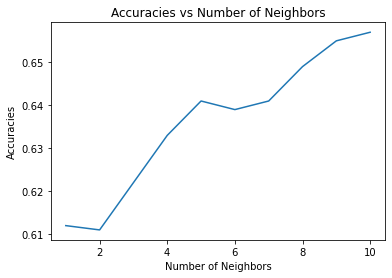

In [252]:
# Model for distance weights and Manhattan Distance across different values of neighbors
# set hyperparameters
n = [1,2,3,4,5,6,7,8,9,10] # number of neighbors
w = 'distance' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN models across different numbers of neighbors
combined_accuracies_2 = []
for i in n:
  model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
  model.fit(mini_train_data, mini_train_labels)

  # Determine the main metric of evaluation: Accuracy
  model_accuracy = model.score(mini_test_data, mini_test_labels)
  combined_accuracies_2.append(model_accuracy)
  print(f"Accuracy of the KNN model with distance weights, Manhattan Distance, and {i} neighbors is {model_accuracy}")

# Plot impact of number of neighbors on accuracies 
plt.figure()
plt.plot(n, combined_accuracies_2)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Number of Neighbors')
plt.show()

Accuracy of the KNN model with uniform weights, Euclidean Distance, and 1 neighbors is 0.617
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 2 neighbors is 0.614
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 3 neighbors is 0.609
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 4 neighbors is 0.614
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 5 neighbors is 0.618
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 6 neighbors is 0.614
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 7 neighbors is 0.623
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 8 neighbors is 0.627
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 9 neighbors is 0.632
Accuracy of the KNN model with uniform weights, Euclidean Distance, and 10 neighbors is 0.643


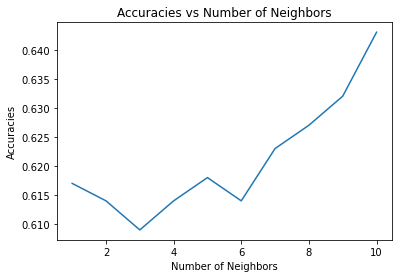

In [253]:
# Model for uniform weights and Euclidean Distance across different values of neighbors
# set hyperparameters
n = [1,2,3,4,5,6,7,8,9,10] # number of neighbors
w = 'uniform' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 2 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN models across different numbers of neighbors
combined_accuracies_3 = []
for i in n:
  model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
  model.fit(mini_train_data, mini_train_labels)

  # Determine the main metric of evaluation: Accuracy
  model_accuracy = model.score(mini_test_data, mini_test_labels)
  combined_accuracies_3.append(model_accuracy)
  print(f"Accuracy of the KNN model with uniform weights, Euclidean Distance, and {i} neighbors is {model_accuracy}")

# Plot impact of number of neighbors on accuracies 
plt.figure()
plt.plot(n, combined_accuracies_3)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Number of Neighbors')
plt.show()

Accuracy of the KNN model with distance weights, Euclidean Distance, and 1 neighbors is 0.617
Accuracy of the KNN model with distance weights, Euclidean Distance, and 2 neighbors is 0.617
Accuracy of the KNN model with distance weights, Euclidean Distance, and 3 neighbors is 0.626
Accuracy of the KNN model with distance weights, Euclidean Distance, and 4 neighbors is 0.641
Accuracy of the KNN model with distance weights, Euclidean Distance, and 5 neighbors is 0.635
Accuracy of the KNN model with distance weights, Euclidean Distance, and 6 neighbors is 0.644
Accuracy of the KNN model with distance weights, Euclidean Distance, and 7 neighbors is 0.636
Accuracy of the KNN model with distance weights, Euclidean Distance, and 8 neighbors is 0.648
Accuracy of the KNN model with distance weights, Euclidean Distance, and 9 neighbors is 0.646
Accuracy of the KNN model with distance weights, Euclidean Distance, and 10 neighbors is 0.649


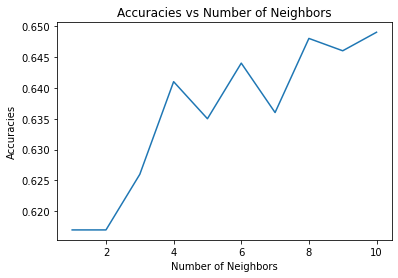

In [254]:
# Model for distance weights and Euclidean Distance across different values of neighbors
# set hyperparameters
n = [1,2,3,4,5,6,7,8,9,10] # number of neighbors
w = 'distance' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 2 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN models across different numbers of neighbors
combined_accuracies_4 = []
for i in n:
  model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
  model.fit(mini_train_data, mini_train_labels)

  # Determine the main metric of evaluation: Accuracy
  model_accuracy = model.score(mini_test_data, mini_test_labels)
  combined_accuracies_4.append(model_accuracy)
  print(f"Accuracy of the KNN model with distance weights, Euclidean Distance, and {i} neighbors is {model_accuracy}")

# Plot impact of number of neighbors on accuracies 
plt.figure()
plt.plot(n, combined_accuracies_4)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Number of Neighbors')
plt.show()

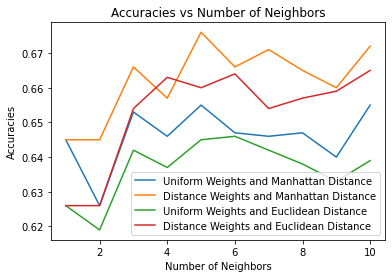

In [188]:
# plot all model accuracies together to determine best hyperparameters
plt.figure()
plt.plot(n, combined_accuracies_1, label = "Uniform Weights and Manhattan Distance")
plt.plot(n, combined_accuracies_2, label = "Distance Weights and Manhattan Distance")
plt.plot(n, combined_accuracies_3, label = "Uniform Weights and Euclidean Distance")
plt.plot(n, combined_accuracies_4, label = "Distance Weights and Euclidean Distance")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Number of Neighbors')
plt.legend()
plt.show()

In [232]:
# Create the KNN model with the hyperparameters that produce the highest accuracy: Distance weights, Manhattan Distance, and 5 neighbors
# set hyperparameters
n = 5 # number of neighbors
w = 'distance' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN model
model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
model.fit(mini_train_data, mini_train_labels)

# Determine the main metric of evaluation: Accuracy
model_accuracy = model.score(mini_test_data, mini_test_labels)
print(f"Accuracy of the KNN model with distance weights, Manhattan Distance, and 5 neighbors is {model_accuracy}")

# Determine the supplementary metrics of evaluation: Precision, Recall, and F1
test_predicted_labels = model.predict(mini_test_data)
classification = classification_report(mini_test_labels, test_predicted_labels) # reports Precision, Recall, and F1 Score
print(f"The classification of KNN model is {classification}")

# Create a confusion matrix for the model
print(confusion_matrix(mini_test_labels, test_predicted_labels))

Accuracy of the KNN model with distance weights, Manhattan Distance, and 5 neighbors is 0.686
The classification of KNN model is               precision    recall  f1-score   support

           0       0.67      0.71      0.69       374
           1       0.70      0.76      0.73       489
           2       0.70      0.68      0.69        56
           3       1.00      0.17      0.29         6
           4       1.00      0.07      0.12        15
           5       0.56      0.21      0.30        24
           6       0.67      0.11      0.19        36

    accuracy                           0.69      1000
   macro avg       0.76      0.39      0.43      1000
weighted avg       0.69      0.69      0.67      1000

[[264 108   0   0   0   0   2]
 [111 373   4   0   0   1   0]
 [  0  16  38   0   0   2   0]
 [  0   0   4   1   0   1   0]
 [  1  13   0   0   1   0   0]
 [  0  11   8   0   0   5   0]
 [ 19  13   0   0   0   0   4]]


## Observe impact of the different data processing techniques
- Normalizing data (data to have values between 0 and 1)
- Converting continous features to be binary
- Stratifying the dataset to ensure class distribution is identical within both training and test sets
- Scaling data

In [255]:
#Normalizing data
n = 5 # number of neighbors
w = 'distance' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN model
model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
model.fit(normalized_mini_training_data, mini_train_labels)

# Determine the main metric of evaluation: Accuracy
model_accuracy_normalized_data = model.score(mini_test_data, mini_test_labels)
print(f"Accuracy of the KNN model with distance weights, Manhattan Distance, 5 neighbors, and using normalized data is {model_accuracy_normalized_data}")

# Determine the supplementary metrics of evaluation: Precision, Recall, and F1
test_predicted_labels = model.predict(mini_test_data)
classification = classification_report(mini_test_labels, test_predicted_labels) # reports Precision, Recall, and F1 Score
print(f"The classification of KNN model is {classification}")

# Create a confusion matrix for the model
print(confusion_matrix(mini_test_labels, test_predicted_labels))

Accuracy of the KNN model with distance weights, Manhattan Distance, 5 neighbors, and using normalized data is 0.464
The classification of KNN model is               precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.46      1.00      0.63       464
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        33

    accuracy                           0.46      1000
   macro avg       0.07      0.14      0.09      1000
weighted avg       0.22      0.46      0.29      1000

[[  0 394   0   0   0   0   0]
 [  0 464   0   0   0   0   0]
 [  0  60   0   0   0   0   0]
 [  0   6   0   0   0   0   0]
 [  0  19   0   0   0   0   0]
 [  0  24   0   0   0   0   0]
 [  0  33   0   0   0   0   0]]


/Users/andrewbeckerman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
#Stratifying data


Accuracy of the KNN model with distance weights, Manhattan Distance, and 5 neighbors is 0.481
The classification of KNN model is               precision    recall  f1-score   support

           0       0.42      0.40      0.41       368
           1       0.51      0.66      0.58       505
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        29

    accuracy                           0.48      1000
   macro avg       0.13      0.15      0.14      1000
weighted avg       0.41      0.48      0.44      1000

[[146 222   0   0   0   0   0]
 [169 335   1   0   0   0   0]
 [  6  40   0   0   0   0   0]
 [  0   8   0   0   0   0   0]
 [  7  11   0   0   0   0   0]
 [  5  21   0   0   0   0   0]
 [ 12  17   0   0   0   0   0]]


/Users/andrewbeckerman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
#Scaling Data
# Load the data from covtype.zip
with ZipFile("covtype.zip") as myzip:
  data = myzip.open("covtype.csv")
df = pd.read_csv(data)
X = preprocessing.scale(df.values[:, :-1])
y = df.values[:, -1]

# ensure input data is floats
X = X.astype('float32')

# label encode target and ensure the values are floats
y = LabelEncoder().fit_transform(y)

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

print('data shape: ', X.shape)
print('label shape:', y.shape)

# Set some variables to hold test and training data.
len_test = int(len(y)* (2/3))
len_train = int(len(y) * (1/3))+1
test_data, test_labels = X[len_test:], y[len_test:]
scaled_train_data, train_labels = X[:len_train], y[:len_train]
scaled_mini_train_data, mini_train_labels = scaled_train_data[:1000], train_labels[: 1000]
mini_test_data, mini_test_labels = test_data[:1000], test_labels[:1000]

n = 5 # number of neighbors
w = 'distance' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
p_value = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2

# Create KNN model
model = KNeighborsClassifier(n_neighbors=i, weights=w, p=p_value)
model.fit(scaled_mini_train_data, mini_train_labels)

# Determine the main metric of evaluation: Accuracy
model_accuracy_scaled_data = model.score(mini_test_data, mini_test_labels)
print(f"Accuracy of the KNN model with distance weights, Manhattan Distance, 5 neighbors, and using scaled data is {model_accuracy_scaled_data}")

# Determine the supplementary metrics of evaluation: Precision, Recall, and F1
test_predicted_labels = model.predict(mini_test_data)
classification = classification_report(mini_test_labels, test_predicted_labels) # reports Precision, Recall, and F1 Score
print(f"The classification of KNN model is {classification}")

# Create a confusion matrix for the model
print(confusion_matrix(mini_test_labels, test_predicted_labels))

data shape:  (581012, 54)
label shape: (581012,)
Accuracy of the KNN model with distance weights, Manhattan Distance, 5 neighbors, and using scaled data is 0.66
The classification of KNN model is               precision    recall  f1-score   support

           0       0.64      0.55      0.59       363
           1       0.68      0.80      0.74       484
           2       0.68      0.78      0.73        63
           3       0.67      0.40      0.50         5
           4       1.00      0.05      0.10        19
           5       0.44      0.32      0.37        25
           6       0.48      0.29      0.36        41

    accuracy                           0.66      1000
   macro avg       0.66      0.46      0.48      1000
weighted avg       0.66      0.66      0.65      1000

[[199 151   0   0   0   0  13]
 [ 79 389  11   0   0   5   0]
 [  1   7  49   1   0   5   0]
 [  0   1   2   2   0   0   0]
 [  6  12   0   0   1   0   0]
 [  0   7  10   0   0   8   0]
 [ 26   3   0   0   0

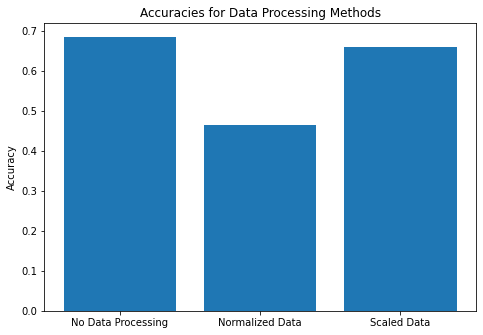

In [246]:
# plot all model accuracies together to determine best data processing method
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data_process = ['No Data Processing', 'Normalized Data', 'Scaled Data']
#plt.plot(model_accuracy, label = "No Data Processing")
#plt.plot(model_accuracy_normalized_data, label = "Normalized Data")
#plt.plot(model_accuracy_scaled_data, label = "Scaled Data")

model_accuracies = [model_accuracy,model_accuracy_normalized_data,model_accuracy_scaled_data]
ax.bar(data_process,model_accuracies)

plt.ylabel('Accuracy')
plt.title('Accuracies for Data Processing Methods')
plt.show()


# Model Creation: Feature Engineering

## Observe the impact of the following Feature Engineering Techniques: 
- TBD 